In [ ]:
import numpy as np
import cvxpy as cvx
import matplotlib.pyplot as plt

### Ao invés de contruirmos um trabalhador inteiro a cada N segundos(leia-se turnos), estaremos contínuamente construindo uma quantidade de trabalhador ϵ, capaz de ϵ-minerar e ϵ-construir.
### As ϵ-construções são capazes de ϵ-treinar ϵ-unidades.

### Dessa forma, em cada turno, só precisamos gerir os Recursos, Unidades e Estruturas como se fossem grandezas contínuas

## $F_{obj}$ = max |Exército|

In [ ]:
Structures = cvx.Variable(1)
Builders   = cvx.Variable(1)
Gatherers  = cvx.Variable(1)
Army       = cvx.Variable(1)
Resources  = cvx.Variable(1)

In [ ]:
F_obj = cvx.Maximize(Army)

## Restrito a: Tempo, Supply, Dinheiro

In [ ]:
a_s = 2 # produão de exercito por estrutura
w_s = 5 # produção de builder por estrutura

c_a = 5 # custo do exercito
c_w = 2 # custo dos builders
c_g = 2 # custo dos gatherers

s_r = -9 # recursos por estruras

In [ ]:
p_r = 3  # produção de recursos por gatherer
b_c = -10 # gasto dos builders

In [ ]:
s_b = 1 # produção de estrutura por builder

In [ ]:
t_lim = 20
t = t_lim

In [ ]:
def f(t, R, S):
    return S*a_s - c_a*R

def g(t, G, B, S):
    return t*(p_r*G + s_r*S + b_c*B)

def h(t, S, R):
    return t*(w_s*S - c_w*R)

def i(t, S, R):
    return h(t, S, R)

def j(t, B, R):
    return t*(s_b*B - R*s_r)

In [ ]:
constraints = [Army == f(t, Resources, Structures), 
               Resources == g(t, Gatherers, Builders, Structures), 
               Gatherers == h(t, Structures, Resources),
               Builders  == i(t, Structures, Resources),
               Structures == j(t, Builders, Resources),
              ]

# $State = [Recursos, Estruturas, Unidades]^T$

### State[i] = [Recursos_i, Estruturas_i, Unidades_i]

# Problema iterativo

S - Estruturas  
R - Recursos  
U - Unidades  

$U = U_1 + U_2 + U_3$

In [ ]:
Max_supply = cvx.Variable(1)
Supply     = cvx.Variable(1)

### As equações:

$ \partial U_2 = C \partial R $, $\partial U_1 = D \partial S $, $ \partial R = E \partial S$  
$ \partial S = F \partial A$

###### Decomposição das variáveis:

$U = U_1 + U_2$  # bulding e gthering  
$S = S_1 + S_2$  # army trainer e worker trainer  
$R = R_1 + R_2$  # dinheiros  

In [ ]:
cvx.constraints = [Max_supply >= Supply, Supply == sum(Workers) + Army, Resources >= 0, Workers >= 0, Army >= 0, Structures >= 1, ]

In [ ]:
cvx.constraints

# Problema bazuka

In [113]:
import cvxpy as cvx
import numpy as np

In [123]:
T = 3

In [124]:
Buildings  = cvx.Variable(3)
Gatherers  = cvx.Variable(3)
Builders   = cvx.Variable(3)
Army       = cvx.Variable(3)
Resources  = cvx.Variable(3)
Max_supply = cvx.Variable(3)

In [125]:
c1 = 2 # buildings costs
c2 = 1 # units costs
k  = 3 # supply per structure

o = 2 # pessoinhas por casinhas
q = 2 # resources gathered per gatherer

In [126]:
F_Obj = cvx.Maximize(Army[-1])

In [127]:
B = cvx.Variable(2)
G = cvx.Variable(2)
Br = cvx.Variable(2)

In [128]:
b0 = cvx.Parameter(1)
g0 = cvx.Parameter(1)
br0 = cvx.Parameter(1)
a0 = cvx.Parameter(1)
r0 = cvx.Parameter(1)
ms0 = cvx.Parameter(1)

In [129]:
b0.value = 2       # starting buildings
g0.value = 2       # starting gatherers
br0.value = 2      # starting builders
a0.value = 4       # starting army
r0.value = 2       # starting resources
ms0.value = 2      # starting maximum supply

## Na mão para 2 estágios

In [130]:
Constraints1 = [B[0] == Buildings[1] - Buildings[0],
              B[0] >= 0,
              G[0] == Gatherers[1] - Gatherers[0],
              G[0] >= 0,
              Br[0] == Builders[1] - Builders[0],
              Br[0]>= 0,
              
             
               
              Army[1]       == Builders[1] + Gatherers[1],
              Army[1] - Army[0] <= o*Buildings[0], 
              Max_supply[1] == Buildings[1]*k,
              Army[1] <= Max_supply[1],
              Resources[1] == Resources[0] + q*Gatherers[0] - c1*B[0] - c2*G[0] - c2*Br[0],
              Resources[1] >= 0,
               
              B[0+1] == Buildings[1+1] - Buildings[0+1],
              B[0+1] >= 0,
              G[0+1] == Gatherers[1+1] - Gatherers[0+1],
              G[0+1] >= 0,
              Br[0+1] == Builders[1+1] - Builders[0+1],
              Br[0+1]>= 0,
              
             
               
              Army[1+1]       == Builders[1+1] + Gatherers[1+1],
              Army[1+1] - Army[0+1] <= o*Buildings[0+1], 
              Max_supply[1+1] == Buildings[1+1]*k,
              Army[1+1] <= Max_supply[1+1],
              Resources[1+1] == Resources[0+1] + q*Gatherers[1] - c1*B[0+1] - c2*G[0+1] - c2*Br[0+1],
              Resources[2] >= 0,
               
             # Stage 0
              Buildings[0] == b0,
              Gatherers[0] == g0,
              Builders[0]  == br0,
              Army[0]      == a0,
              Resources[0] == r0,
              Max_supply[0]== ms0,
              ]

## Com um for

In [131]:
Constraints2 = [Buildings[0] == b0,
              Gatherers[0] == g0,
              Builders[0]  == br0,
              Army[0]      == a0,
              Resources[0] == r0,
              Max_supply[0]== ms0,
              B >= 0,
              G >= 0,
              Br>= 0]

for i in range(T-1):
    Constraints.append(B[i]  == Buildings[i+1] - Buildings[i])
    Constraints.append(Buildings[i+1] == Buildings[i] + c*Builders[i])
    Constraints.append(G[i]  == Gatherers[i+1] - Gatherers[i])
    Constraints.append(Br[i] == Builders[i+1]  - Builders[i])
#    Constraints.append(c1*B[i] + c2*G[i] + c2*Br[i] <= Resources[i])
    Constraints.append(Army[i+1] == Builders[i+1] + Gatherers[i+1])
    Constraints.append(Army[i+1] - Army[i] <= o*Buildings[i])
    Constraints.append(Army[i+1] <= Max_supply[i+1])
    Constraints.append(Max_supply[i+1] == Buildings[i+1]*k)
    Constraints.append(Resources[i+1] == Resources[i] + q*Gatherers[i] - c1*B[i] - c2*G[i] - c2*Br[i])
    Constraints.append(Resources[i+1] >= 0)   

## Forma Vetorizada

In [132]:
Constraints = [B == Buildings[1:] - Buildings[:-1],
              B >= 0,
              G == Gatherers[1:] - Gatherers[:-1],
              G >= 0,
              Br == Builders[1:] - Builders[:-1],
              Br>= 0,
#              c1*B + c2*G + c2*Br <= Resources[:-1],
               
              Army       == Builders + Gatherers,
              Army[1:] - Army[:-1] <= o*Buildings[:-1], 
              Max_supply == Buildings*k,
               
              Resources[1:] == Resources[:-1] + q*Gatherers[1:] - c1*B[:-1] - c2*G[:-1] - c2*Br[:-1],
               
               
             # Stage 0
              Buildings[0] == b0,
              Gatherers[0] == g0,
              Builders[0]  == br0,
              Army[0]      == a0,
              Resources[0] == r0,
              Max_supply[0]== ms0,
              ]

In [133]:
problem = cvx.Problem(F_Obj, Constraints1)

In [134]:
problem.solve()

13.999999992420967

In [135]:
Buildings.value

matrix([[2.        ],
        [3.09909281],
        [4.79537313]])

In [136]:
Gatherers.value

matrix([[2.        ],
        [5.0885311 ],
        [8.18760585]])

In [137]:
Builders.value

matrix([[2.        ],
        [2.71328327],
        [5.81239414]])

In [138]:
Army.value

matrix([[ 4.        ],
        [ 7.80181437],
        [13.99999999]])

In [139]:
Resources.value

matrix([[2.00000000e+00],
        [5.86803774e-09],
        [5.86315957e-01]])

In [140]:
Max_supply.value

matrix([[ 2.        ],
        [ 9.29727843],
        [14.38611938]])

In [141]:
for i in problem.constraints:
    if i.dual_value > 1:
        print(i)
    #print(i.dual_value)

var1631[0, 0] == param1640
var1632[0, 0] == param1641


## Um problema de T estágios

In [431]:
import cvxpy as cvx
import numpy as np

In [466]:
T = 5

In [467]:
Buildings  = cvx.Variable(T)
Gatherers  = cvx.Variable(T)
Builders   = cvx.Variable(T)
Army       = cvx.Variable(T)
Resources  = cvx.Variable(T)
Max_supply = cvx.Variable(T)

In [468]:
custo_building      = 2 # buildings costs                         recurso/casinha
custo_units         = 1 # units costs                             recurso/pessoinha
supply_building     = 3 # supply per structure                    caminha/casinha
army_building       = 2 # army trained per house                   pessoinhas/casinha
building_builder    = 1 # buildings constructed per builder       casinhas/pessoinha1
production_gatherer = 2 # resources gathered per gatherer          recursos/pessoinha2

In [495]:
F_Obj = cvx.Maximize(Army[-1])

In [496]:
B = cvx.Variable(T-1)
G = cvx.Variable(T-1)
Br = cvx.Variable(T-1)

In [497]:
b0 = cvx.Parameter(1)
g0 = cvx.Parameter(1)
br0 = cvx.Parameter(1)
r0 = cvx.Parameter(1)
ms0 = cvx.Parameter(1)

In [498]:
b0.value  = 1       # starting buildings
g0.value  = 1       # starting gatherers
br0.value = 0       # starting builders
r0.value  = 0       # starting resources
ms0.value = 2       # starting maximum supply

In [499]:
Constraints = [Buildings[0] == b0,
              Gatherers[0] == g0,
              Builders[0]  == br0,
              Army[0]      == g0 + br0,
              Resources[0] == r0,
              B >= 0,
              G >= 0,
              Br>= 0]

for i in range(T-1):
    
    Constraints.append(B[i]  == Buildings[i+1] - Buildings[i])
    Constraints.append(Br[i] == Builders[i+1]  - Builders[i])
    Constraints.append(G[i]  == Gatherers[i+1] - Gatherers[i])
    
    Constraints.append(B[i] <= building_builder*Builders[i])
    Constraints.append(Br[i] + G[i] <= army_building*Buildings[i])
    
    Constraints.append(Army[i+1]           == Builders[i+1] + Gatherers[i+1])
    Constraints.append(Army[i+1]           <= Buildings[i+1]*supply_building)
    
    Constraints.append(Resources[i+1] == Resources[i]
                       + production_gatherer*Gatherers[i]
                       - custo_building*B[i] - custo_units*(G[i] + Br[i]))    
    Constraints.append(Resources[i+1] >= 0)
    Constraints.append(Resources[i]   >= custo_building*B[i] + custo_units*(G[i] + Br[i]))


In [500]:
problem = cvx.Problem(F_Obj, Constraints)

In [501]:
%time problem.solve(solver='ECOS') #SCS

Wall time: 62.8 ms


1.4000000010758267

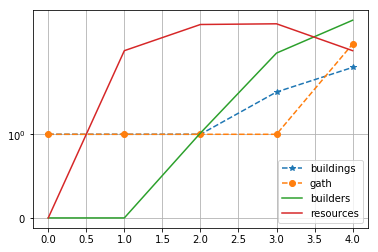

In [503]:
plt.plot(Buildings.value,'--*', label='buildings')

plt.plot(Gatherers.value,'o--', label='gath')
plt.plot(Builders.value, label='builders')
#plt.plot(Army.value, label='')
plt.plot(Resources.value, label='resources')
#plt.plot(Max_supply.value, label='')
#plt.plot(B.value, label='')
#plt.plot(G.value, label='')

plt.yscale('symlog')
plt.grid()
plt.legend();